In [1]:
# ln -s ../code/analytic.py analytic.py
%matplotlib inline

import numpy as np
import pandas as pd
import math

import thinkstats2
import thinkplot

#import nsfg
#import first
#import brfss
#import scatter

In [2]:
def RMSE(estimates,actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

def SimulateSample(mu=90, sigma=7.5, n=9, m=1000):

    def Vertline(x, y=1):
        thinkplot.Plot([x,x],[0,y], color='0.8', linewidth=3)

    means=[]
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
    
    cdf=thinkstats2.Cdf(means)
    ci=cdf.Percentile(5), cdf.Percentile(95)
    stderr = RMSE(means, mu)

    print(f'standard error: {stderr:.3f}')
    print(f'confidence interval: {ci[0]:.3f}, {ci[1]:.3f}')
    Vertline(ci[0])
    Vertline(ci[1])
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='sample mean', ylabel='CDF',
                     title='Sampling distribution')

standard error: 2.497
confidence interval: 85.884, 94.144


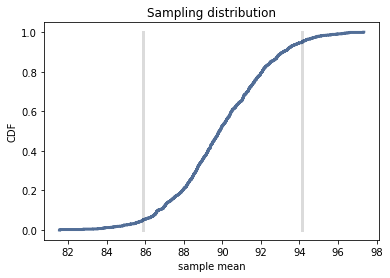

In [3]:
SimulateSample()

## Exponential distributions

In [4]:
sample = [5.384, 4.493, 19.198, 2.790, 6.122, 12.844]

In [5]:
def MeanError(estimates, actual):
    errors = [estimate - actual for estimate in estimates]
    return np.mean(errors)

In [11]:
# median of an exponential distribution is ln(2)/lambda
def Estimate(n=7, m=1000):
    lam=2

    means=[]
    medians=[]
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print(f'rmse L, {RMSE(means, lam):.2f}')
    print(f'rmse Lm, {RMSE(medians, lam):.2f}')
    print(f'mean error L, {MeanError(means, lam):.2f}')
    print(f'mean error Lm, {MeanError(medians, lam):.2f}')

In [13]:
Estimate()

rmse L, 1.11
rmse Lm, 2.02
mean error L, 0.32
mean error Lm, 0.48


## Exercises

In [17]:
import thinkstats2
import thinkplot

import math
import random
import numpy as np

from scipy import stats
import estimation as est

In [25]:
est.Estimate1(7, 1000)

Experiment 1
rmse xbar 0.3708073891698966
rmse median 0.4437661440478869


In [27]:
est.Estimate2(7, 1000)

Experiment 2
mean error biased -0.15836634731551522
mean error unbiased -0.018094071868101122


In [28]:
test = np.random.normal(90, 7.5, 10000)
cdf = thinkstats2.Cdf(test)

In [29]:
cdf

Cdf([ 61.67367658  62.68879597  63.37144808 ... 115.52132745 116.36471525
 117.54934411], [1.000e-04 2.000e-04 3.000e-04 ... 9.998e-01 9.999e-01 1.000e+00])

{'xscale': 'linear', 'yscale': 'linear'}

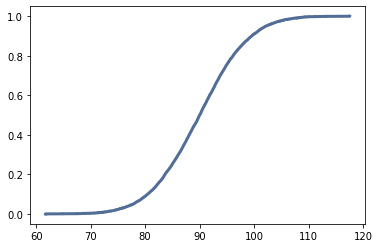

In [30]:
thinkplot.Cdf(cdf)

In [32]:
est.SimulateSample()

standard error 2.5036853578684175
confidence interval (85.84278135032382, 93.84704661826474)
Writing estimation1.pdf
Writing estimation1.png


<Figure size 576x432 with 0 Axes>